In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the uploaded dataset to inspect its structure
file_path = 'resources/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset to understand its structure and variables
data.head(), data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
 0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

In [28]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop(columns=['Diabetes_012'])  # Features
y = data['Diabetes_012']  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((202944, 21), (50736, 21), (202944,), (50736,))

In [29]:
# Further split the training data into training and validation sets (80% train, 20% validation)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Display the shapes of the resulting splits
X_train_final.shape, X_val.shape, y_train_final.shape, y_val.shape


((162355, 21), (40589, 21), (162355,), (40589,))

In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform training and validation sets
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Confirm scaling by checking the mean and standard deviation of the scaled data (should be 0 and 1 for training set)
X_train_final_scaled_mean = X_train_final_scaled.mean(axis=0)
X_train_final_scaled_std = X_train_final_scaled.std(axis=0)

X_train_final_scaled_mean[:5], X_train_final_scaled_std[:5]  # Displaying first 5 feature stats for brevity


(array([-1.57553130e-18,  6.45092540e-17, -2.73376564e-16, -4.96730008e-17,
        -6.06579552e-17]),
 array([1., 1., 1., 1., 1.]))

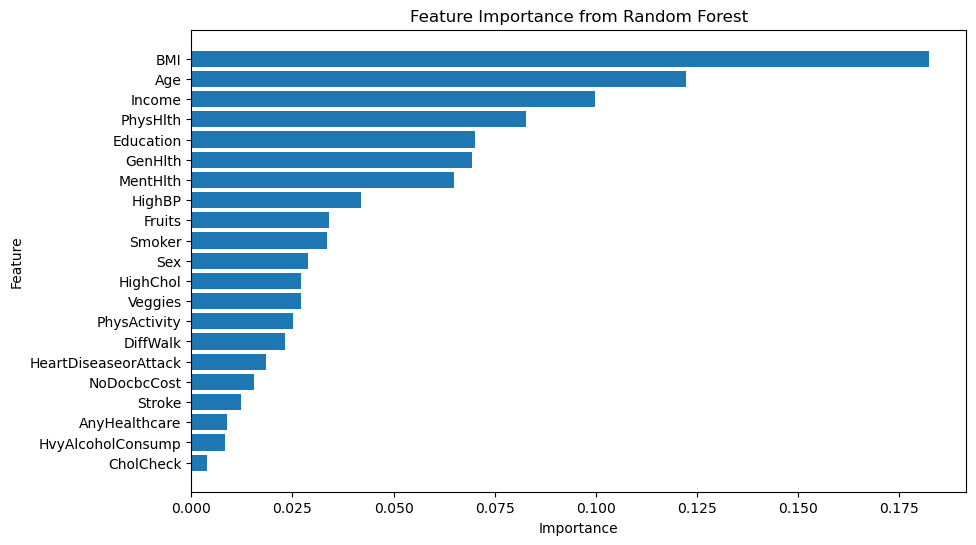

,Feature,Importance
3,BMI,0.182551
18,Age,0.122285
20,Income,0.099897
15,PhysHlth,0.082708
19,Education,0.070031


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


# Separate features (X) and target variable (y)
X = data.drop(columns=['Diabetes_012'])  # Features
y = data['Diabetes_012']  # Target

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Scale the data
scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model to assess feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_final_scaled, y_train_final)

# Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

# Display the top 5 most important features
feature_importance_df.head()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


logistic_model = LogisticRegression(max_iter=1000, random_state=42)


logistic_model.fit(X_train_final_scaled, y_train_final)


y_val_pred = logistic_model.predict(X_val_scaled)
y_val_prob = logistic_model.predict_proba(X_val_scaled)


print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


roc_auc = roc_auc_score(y_val, y_val_prob, multi_class="ovr")
print(f"ROC-AUC Score (Validation Set): {roc_auc:.4f}")


y_test_pred = logistic_model.predict(X_test_scaled)
y_test_prob = logistic_model.predict_proba(X_test_scaled)


print("\nTest Set Evaluation:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


roc_auc_test = roc_auc_score(y_test, y_test_prob, multi_class="ovr")
print(f"ROC-AUC Score (Test Set): {roc_auc_test:.4f}")


Validation Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     34193
         1.0       0.00      0.00      0.00       741
         2.0       0.52      0.17      0.26      5655

    accuracy                           0.85     40589
   macro avg       0.46      0.38      0.39     40589
weighted avg       0.80      0.85      0.81     40589

Confusion Matrix:
[[33342     0   851]
 [  691     0    50]
 [ 4692     0   963]]
ROC-AUC Score (Validation Set): 0.7794

Test Set Evaluation:


c:\Users\ssarv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ssarv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ssarv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.51      0.18      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736

Confusion Matrix:
[[41656     0  1085]
 [  838     0    88]
 [ 5827     0  1242]]
ROC-AUC Score (Test Set): 0.7808


c:\Users\ssarv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ssarv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ssarv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
